AGE DETECTION OF INDIAN ACTORS USING DEEP LEARNING

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Importing other libraries
import os
import random

In [3]:
## Seeing the paths
root_dir = os.path.abspath('.')

In [4]:
root_dir

'C:\\Users\\sreeram\\Desktop\\MOOCS\\Analytics Vidhya\\AV PROJECTS\\AGE DETECTION OF INDIAN ACTORS'

In [5]:
root_dir2 = os.path.abspath('AGE DETECTION OF INDIAN ACTORS')

In [6]:
root_dir2

'C:\\Users\\sreeram\\Desktop\\MOOCS\\Analytics Vidhya\\AV PROJECTS\\AGE DETECTION OF INDIAN ACTORS\\AGE DETECTION OF INDIAN ACTORS'

In [7]:
data_dir = 'C:\\Users\\sreeram\\Desktop\\MOOCS\\Analytics Vidhya\\AV PROJECTS\\AGE DETECTION OF INDIAN ACTORS'

In [8]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))

In [9]:
train.head(5)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [10]:
test = pd.read_csv(os.path.join(data_dir,'test.csv'))

In [11]:
test.head(5)

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


Randomly choose a image and print it


In [12]:
train.index

RangeIndex(start=0, stop=19906, step=1)

In [13]:
## Choosing random index
i = random.choice(train.index)

In [17]:
img_name = train.ID[i]

In [18]:
img_name

'9692.jpg'

In [19]:
i

365

In [20]:
img = imread(os.path.join(data_dir,'Train',img_name))

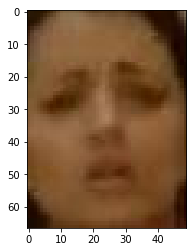

In [21]:
imshow(img)

In [22]:
train.head(3)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE


In [25]:
print(train['Class'][365])

YOUNG


In [27]:
train.ID[3]

'16496.jpg'

In [28]:
from scipy.misc import imresize

In [32]:
## Resizing the images
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir,'Train',img_name)
    img = imread(img_path)
    img = imresize(img,(32,32))
    img = img.astype('float32')
    temp.append(img)

In [34]:
temp[1]

array([[[  46.,   29.,   34.],
        [  46.,   30.,   33.],
        [  44.,   31.,   32.],
        ..., 
        [  37.,   21.,   12.],
        [  35.,   22.,   13.],
        [  36.,   25.,   16.]],

       [[  41.,   26.,   29.],
        [  40.,   26.,   28.],
        [  39.,   27.,   27.],
        ..., 
        [  43.,   24.,   13.],
        [  38.,   23.,   13.],
        [  37.,   23.,   14.]],

       [[  35.,   24.,   24.],
        [  36.,   24.,   24.],
        [  36.,   25.,   23.],
        ..., 
        [  56.,   32.,   19.],
        [  44.,   25.,   12.],
        [  39.,   24.,   14.]],

       ..., 
       [[ 219.,  186.,  161.],
        [ 188.,  150.,  127.],
        [ 181.,  142.,  122.],
        ..., 
        [  57.,   28.,   13.],
        [  52.,   28.,   12.],
        [  53.,   27.,   14.]],

       [[ 134.,   73.,   58.],
        [ 117.,   56.,   41.],
        [ 131.,   70.,   56.],
        ..., 
        [  69.,   29.,   15.],
        [  59.,   28.,   12.],
        [ 

In [35]:
train_x = np.stack(temp)

In [36]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [38]:
## Normalize images for faster training
train_x = train_x/255
test_x = test_x/255

In [58]:
train_x[1:3,1:3]

array([[[[ 0.16078432,  0.10196079,  0.11372549],
         [ 0.15686275,  0.10196079,  0.10980392],
         [ 0.15294118,  0.10588235,  0.10588235],
         [ 0.14509805,  0.10588235,  0.09803922],
         [ 0.13725491,  0.10196079,  0.08627451],
         [ 0.13725491,  0.10588235,  0.08235294],
         [ 0.16862746,  0.09411765,  0.0627451 ],
         [ 0.20392157,  0.09803922,  0.05882353],
         [ 0.27058825,  0.13725491,  0.09019608],
         [ 0.41960785,  0.26274511,  0.20784314],
         [ 0.47450981,  0.30588236,  0.25882354],
         [ 0.50980395,  0.34509805,  0.30980393],
         [ 0.51372552,  0.35294119,  0.32549021],
         [ 0.41568628,  0.25490198,  0.22745098],
         [ 0.34509805,  0.18039216,  0.15294118],
         [ 0.30980393,  0.14901961,  0.11372549],
         [ 0.29411766,  0.13725491,  0.09411765],
         [ 0.30588236,  0.14509805,  0.09803922],
         [ 0.32941177,  0.16862746,  0.11764706],
         [ 0.34901962,  0.17647059,  0.13333334],


In [39]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [40]:
test['Class'] = 'Middle'

In [41]:
test.to_csv('baseline.csv',index =  False)

In [42]:
## Building the model
import keras
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [43]:
lb = LabelEncoder()

In [44]:
# Encoding the categorical output variable
train_y = lb.fit_transform(train.Class)

In [45]:
train_y

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
## Creating dummies for each class
train_y = keras.utils.np_utils.to_categorical(train_y)

In [47]:
train_y

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [48]:
## NEURAL NETWORK BULIDING

In [49]:
## Creating a list of parameters to be used

input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [51]:
# Import the necessary keras modules
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [52]:
# Defining our network
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [59]:
# compile our network and let it train for a while
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
19906/19906 [==============================] - 10s - loss: 0.8922 - acc: 0.5801      

In [60]:
train_x.shape

(19906, 32, 32, 3)

In [61]:
## Validation
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 7s - loss: 0.7981 - acc: 0.6353 - val_loss: 0.8165 - val_acc: 0.6223

In [64]:
## Predicting the classes
pred = model.predict_classes(test_x)

6464/6636 [============================>.] - ETA: 0s

In [65]:
pred

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
pred = lb.inverse_transform(pred)

In [67]:
test['Class'] = pred

In [68]:
test.to_csv('NeuralNetwork1.csv', index = False)

In [93]:
## Taking a random image and 
i = random.choice(train.index)

In [94]:
img_name = train.ID[i]

In [95]:
img = imread(os.path.join(data_dir,'Train',img_name)).astype('float32')

In [96]:
pred = model.predict_classes(train_x)

19906/19906 [==============================] - 3s     

In [97]:
print('Original:',train.Class[i], 'Predicted:',lb.inverse_transform(pred[i]))

Original: YOUNG Predicted: YOUNG


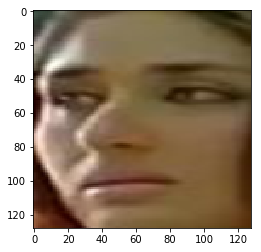

In [98]:
imshow(imresize(img, (128, 128)))